Group 4: Jayson, Saul, Chunmei, and Daniel

In a Yule process, the number of births is proportional to the size of the population. We implement this here and a non-homogenous perturbation of the process modeling e.g seasonal variability in the birth rate:

First, we implement the Yule process with a fixed rate v = 0.4n, where n is the size of the population

Second, we do the same with rate v = 0.4n + 2sin(t)

We simulate the population on the time interval [0,100]. In all cases show the distribution of population sizes at t = 10, 50, and 100. Start with n(0) = 1.

In [ ]:
from scipy.stats import gamma
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [35]:
# Generate a random sample Y from the uniform distribution

seed = 98765

np.random.seed(seed)

def yule(N, trajectories, v, N0):
    s = np.zeros((trajectories, N))
    X = np.zeros((trajectories, N))
    X[:,0] = N0
    h= 0
    
    for j in range(trajectories):
        for i in range(N-1):
            h = -np.log(np.random.rand())/(v*X[j,i])
            s[j, i+1] = s[j, i] + h
            X[j, i+1] = X[j, i] + 1
            
    return [s, X]

def yuleSeasonal(N, trajectories, v, N0):
    s = np.zeros((trajectories, N))
    X = np.zeros((trajectories, N))
    X[:,0] = N0
    h= 0
    
    for j in range(trajectories):
        for i in range(N-1):
            h = -np.log(np.random.rand())/((v*X[j,i])+(2*np.sin(h)))
            s[j, i+1] = s[j, i] + h
            X[j, i+1] = X[j, i] + 1
            
    return [s, X]

def deterministic(s, N, v, N0):
    tmax = max(s[:, -1])
    t = np.linspace(0, tmax, 10*N)
    yd = N0*np.exp(v*t)
    
    return[t, yd]

def solve_and_plot(N, trajectories, v, X0):
    fig, ax = plt.subplots()
    
    [sojourn, population] = yuleSeasonal(N, trajectories, v, X0)
    [time, detsol] = deterministic(sojourn, N, v, X0)

    ## Sets axis ranges for plotting
    xmax = max([max(sojourn[k,:]) for k in range(trajectories)])
    ymin = min([min(population[k, :]) for k in range(trajectories)])
    ymax = max([max(population[k, :]) for k in range(trajectories)])
    
    ## Generates plots
    for r in range(trajectories):
        plt.step(sojourn[r,:], population[r,:], where='post', label="Trajectory %s " % str(r+1))
        
    plt.plot(time, detsol, 'k--', label="Determinstic")
    plt.axis([-0.2, xmax+0.2, ymin-2, ymax+2])
    ax.set_xlabel('Time', fontsize=14)
    ax.set_ylabel('Population Size', fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.tight_layout()
    plt.legend(loc=2)
    plt.show() 

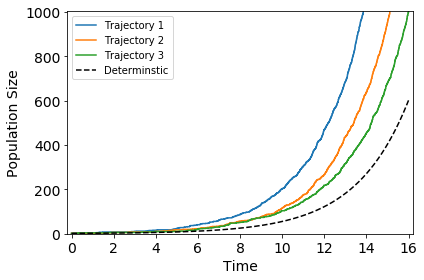

In [89]:
maxPop = 1000
    
trajectories = 3
birthrate = 0.4
initPop = 1
    
solve_and_plot(maxPop, trajectories, birthrate, initPop) 

In [150]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.misc
import scipy.special
from matplotlib.lines import Line2D

def probdist(t_max,b,maxPop):
    t = np.arange(0, t_max+1, t_steps)   # time vector
    k = np.arange(0, maxPop+1)  # population vector
    p = np.zeros((len(t), len(k)))
    
    
    
    for i in range(len(t)):      # for each time
        for j in range (len(k)):    # for range in population
            p[i][j] = np.exp(-b*t[i])*(1-np.exp(-b*t[i]))**k[j]
            
    return [p, t, k]


Text(0, 0.5, 'Probability for each population size')

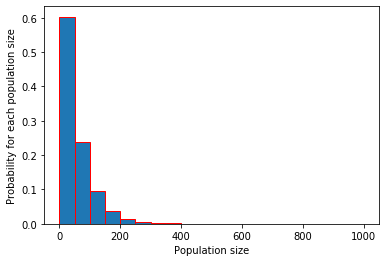

In [153]:
t_max = 100
t_steps = 10
birth = 0.4
maxPop = 1000;

[p, t, k] = probdist(t_max, birth, maxPop)

dn = int(maxPop/20)

hist = []
N = []

# plot the distribution of population size
for i in range(20):
    currentPop = p[1][:]
    hist.append(np.sum(currentPop[i*dn:i*dn+dn]))
    N.append(k[i*dn+int(dn/2)])
                
plt.bar(N,hist,width=dn,edgecolor='r')
plt.xlabel('Population size')
plt.ylabel('Probability for each population size')